# Analyses quantitatives des données RNA-seq HHV8 : (FeatureCounts)

In [1]:
# Analyse différentille hhv8 :
# install :
#%pip install pandas
#%pip install matplotlib seaborn
#%pip install scikit-learn
#%pip install scipy
#%pip install seaborn
#jupyter nbconvert --to html benchmarking_2tools_test.ipynb

In [11]:
import os
import pandas as pd

# count_featurecounts
count_dir = "./count_featurecounts/"
output_matrix = "./count_featurecounts/gene_count_matrix_featurecounts.csv"


files = [f for f in os.listdir(count_dir) if f.endswith("_counts.txt")]
dfs = []

for file in files:
    sample_name = file.replace("_not_hg38_counts.txt", "")
    path = os.path.join(count_dir, file)
    
    df = pd.read_csv(path, sep='\t', skiprows=1)
    
    df = df[['Geneid', df.columns[-1]]] 
    df.columns = ['Geneid', sample_name]
    dfs.append(df.set_index('Geneid'))


combined_df = pd.concat(dfs, axis=1)

# remove les gènes "unassigned"
combined_df = combined_df[~combined_df.index.str.contains("unassigned", na=True)]

combined_df.to_csv(output_matrix)
print(f"Matrice donnnnnneeeeeee: {output_matrix}")

Matrice donnnnnneeeeeee: ./count_featurecounts/gene_count_matrix_featurecounts.csv


In [12]:
# Normalisation des données log(CPM + 1)
import pandas as pd
import numpy as np


matrix_path = "./count_featurecounts/gene_count_matrix_featurecounts.csv"
count_matrix = pd.read_csv(matrix_path, index_col="Geneid")

# CPM (Counts Per Million)
cpm_matrix = count_matrix / count_matrix.sum() * 1e6

# Log transformation (log2 avec un pseudo-count de 1)
log_cpm_matrix = np.log2(cpm_matrix + 1)


log_cpm_matrix.to_csv("./count_featurecounts/gene_log_cpm_matrix.csv")
print("Matrice normalisée (log2(CPM + 1)) sauvegardée !")

print("\nExemple de la matrice normalisée :")
print(log_cpm_matrix.head())

Matrice normalisée (log2(CPM + 1)) sauvegardée !

Exemple de la matrice normalisée :
               KAP_57_S3  KAP_66_S7  KAP_67_2_S8  KAP_40_S3  KAP_53_S11  \
Geneid                                                                    
HHV8GK18_gp01        0.0        0.0          NaN    0.00000         NaN   
HHV8_gs01            0.0        0.0          NaN    0.00000         NaN   
HHV8GK18_gp38        0.0        0.0          NaN    0.00000         NaN   
HHV8GK18_gp39        0.0        0.0          NaN    0.00000         NaN   
HHV8GK18_gp62        0.0        0.0          NaN   12.20736         NaN   

               KAP_43_S5  KAP_44_S6  KAP_71_S11  KAP_64_S6  KAPKEY13_S10  ...  \
Geneid                                                                    ...   
HHV8GK18_gp01  13.212422        NaN         NaN   8.490570           0.0  ...   
HHV8_gs01       0.000000        NaN         NaN   9.488563           0.0  ...   
HHV8GK18_gp38   0.000000        NaN         NaN   7.907612       

In [13]:

#Charger les data et librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


matrix_path = "./count_featurecounts/gene_log_cpm_matrix.csv"
df_counts = pd.read_csv(matrix_path, index_col=0)

#print("Dimensions:", df_counts.shape)
print("Extrait de 10 ech de matrice counts FeatureCount:")

pd.set_option('display.max_rows', None)
display(df_counts.iloc[:, :10])
pd.reset_option('display.max_rows')

Extrait de 10 ech de matrice counts FeatureCount:


,KAP_57_S3,KAP_66_S7,KAP_67_2_S8,KAP_40_S3,KAP_53_S11,KAP_43_S5,KAP_44_S6,KAP_71_S11,KAP_64_S6,KAPKEY13_S10
Geneid,,,,,,,,,,
HHV8GK18_gp01,0.000000,0.00000,NaN,0.000000,NaN,13.212422,NaN,NaN,8.490570,0.00000
HHV8_gs01,0.000000,0.00000,NaN,0.000000,NaN,0.000000,NaN,NaN,9.488563,0.00000
HHV8GK18_gp38,0.000000,0.00000,NaN,0.000000,NaN,0.000000,NaN,NaN,7.907612,0.00000
HHV8GK18_gp39,0.000000,0.00000,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.00000
HHV8GK18_gp62,0.000000,0.00000,NaN,12.207360,NaN,0.000000,NaN,NaN,9.903099,0.00000
HHV8GK18_gp63,13.582958,0.00000,NaN,0.000000,NaN,11.549786,NaN,NaN,10.072856,0.00000
HHV8GK18_gp64,0.000000,0.00000,NaN,12.207360,NaN,14.847034,NaN,NaN,9.903099,19.93157
HHV8GK18_gp65,0.000000,0.00000,NaN,11.207665,NaN,13.664893,NaN,NaN,9.903099,0.00000
HHV8GK18_gp79,19.904770,19.93157,NaN,19.907496,NaN,19.837788,NaN,NaN,19.909846,0.00000


Statistiques par échantillon


,Total Reads,Moyenne par gène,Médiane par gène
KAP_70_S10,198.663536,11.036863,11.091790
KAP51_S5,192.646125,10.702563,10.752983
KAP32_S1,180.668725,10.037151,9.629005
KAP_74_S3,176.658265,9.814348,11.758848
KAP_62_2_S1,168.419090,9.356616,9.756248
KAP_64_S6,165.589386,9.199410,9.903099
KAP38_S3,165.444156,9.191342,10.388773
KAP39_S4,157.842751,8.769042,9.995996
KAP_63_S5,153.951895,8.552883,9.716674
KAP_45_S7,146.356860,8.130937,8.236619


/tmp/ipykernel_112437/4018573672.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_reads_per_sample.index, y="Total Reads", data=total_reads_per_sample, palette="viridis")


Histogramme : nombre total de reads par échantillon


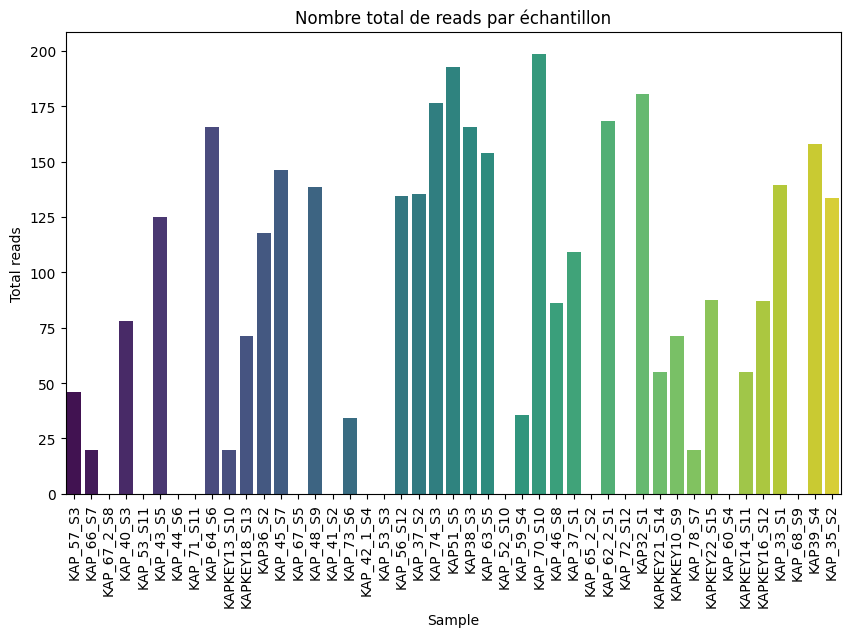

In [14]:

#Tableau : Nombre total de reads par échantillon + Graphique

# total de reads par sample
total_reads_per_sample = df_counts.sum().to_frame(name="Total Reads")
total_reads_per_sample["Moyenne par gène"] = df_counts.mean()
total_reads_per_sample["Médiane par gène"] = df_counts.median()

print("Statistiques par échantillon")
display(total_reads_per_sample.sort_values(by="Total Reads", ascending=False))
#test modifiy os
# Histogramme
plt.figure(figsize=(10,6))
sns.barplot(x=total_reads_per_sample.index, y="Total Reads", data=total_reads_per_sample, palette="viridis")
plt.xticks(rotation=90)
plt.title("Nombre total de reads par échantillon")
plt.xlabel("Sample")
plt.ylabel("Total reads")
print("Histogramme : nombre total de reads par échantillon")
plt.show()

In [15]:
# Dictionnaire : identifiant eeee abréviation/fonction
print("Affichage des gènes présents dans df_counts avec leur abréviation NCBI")
gene_abbr = {
    "HHV8GK18_gp01": "K1",
    "HHV8_gs01": "miscRNA01",
    "HHV8GK18_gp39": "ORF35",
    "HHV8GK18_gp38": "ORF34",
    "HHV8GK18_gp62": "vIRF-1 (K9)",
    "HHV8GK18_gp63": "vIRF-4",
    "HHV8GK18_gp64": "vIRF-3",
    "HHV8GK18_gp65": "vIRF-2",
    "HHV8GK18_gp79": "K12",
    "HHV8_gs02": "miscRNA02",
    "HHV8_gs03": "miscRNA03",
    "HHV8_gs04": "miscRNA04",
    "HHV8_gs05": "miscRNA05",
    "HHV8_gs06": "miscRNA06",
    "HHV8_gs07": "miscRNA07",
    "HHV8_gs08": "miscRNA08",
    "HHV8_gs09": "miscRNA09",
    "HHV8_gs10": "miscRNA10"
}
# Afficher tous les gènes présents dans df_counts avec leur abréviation
gene_table = pd.DataFrame({
    "Geneid": df_counts.index,
    "Abréviation NCBI": [gene_abbr.get(g, "") for g in df_counts.index]
})


display(gene_table)

Affichage des gènes présents dans df_counts avec leur abréviation NCBI


,Geneid,Abréviation NCBI
0,HHV8GK18_gp01,K1
1,HHV8_gs01,miscRNA01
2,HHV8GK18_gp38,ORF34
3,HHV8GK18_gp39,ORF35
4,HHV8GK18_gp62,vIRF-1 (K9)
5,HHV8GK18_gp63,vIRF-4
6,HHV8GK18_gp64,vIRF-3
7,HHV8GK18_gp65,vIRF-2
8,HHV8GK18_gp79,K12
9,HHV8_gs02,miscRNA02



Gènes les plus exprimés :
Geneid
HHV8GK18_gp79    16.563102
HHV8_gs01         9.772442
HHV8GK18_gp64     8.487272
HHV8GK18_gp63     8.159719
HHV8GK18_gp65     6.969021
HHV8_gs02         6.838101
HHV8_gs04         6.483332
HHV8_gs03         5.964867
HHV8_gs05         5.923664
HHV8GK18_gp62     5.439744
dtype: float64

Heatmap des gènes les plus exprimés (top 20):


<Figure size 1000x800 with 0 Axes>

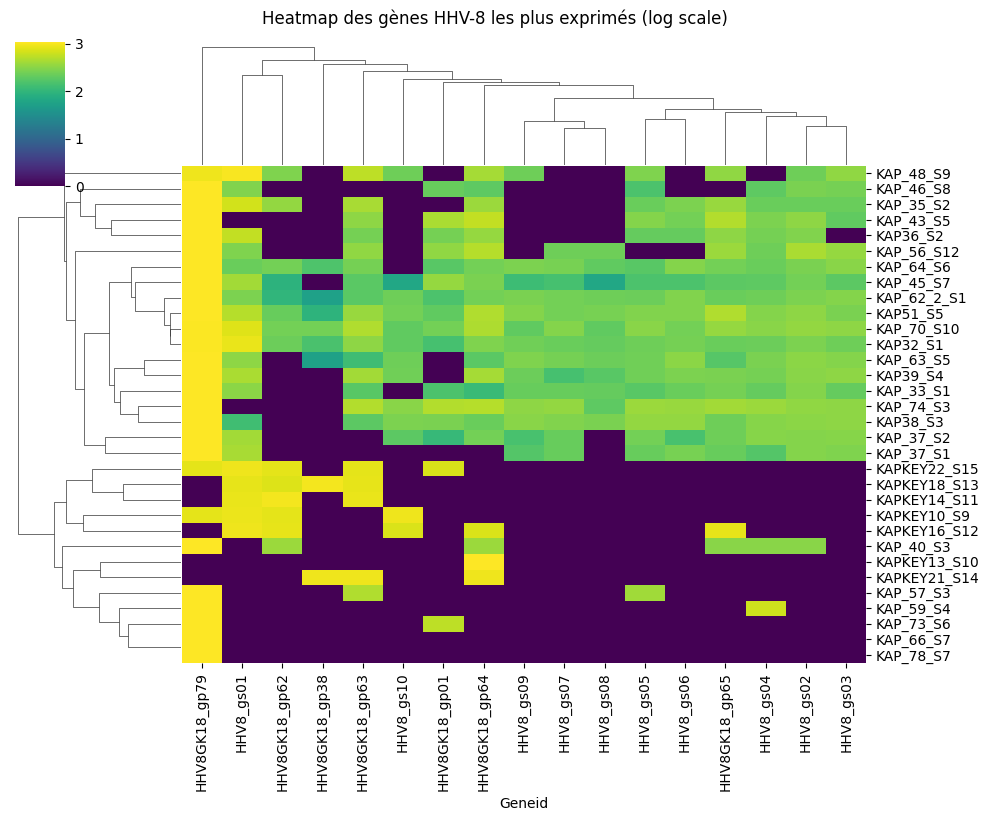


1 gènes sans expression :
['HHV8GK18_gp39']


In [ ]:
# Moyenne d'expression par gène
mean_expression = df_counts.mean(axis=1).sort_values(ascending=False)
print("\nGènes les plus exprimés :")
print(mean_expression.head(10))




df_filtered = df_counts.loc[:, df_counts.sum() > 0]  
df_gene_sorted = df_filtered.T 

top_genes = mean_expression[mean_expression > 0].head(20).index.tolist()
df_top_genes = df_gene_sorted[top_genes]

#heatmap
df_log = df_top_genes.apply(lambda x: np.log(x + 1))

plt.figure(figsize=(10, 8))
sns.clustermap(df_log, cmap="viridis", yticklabels=True, xticklabels=True, annot=False, figsize=(10, 8))
print("\nHeatmap des gènes les plus exprimés (top 20):")
plt.suptitle("Heatmap des gènes HHV-8 les plus exprimés (log scale)", y=1.02)
plt.show()

zero_genes = df_counts[df_counts.sum(axis=1) == 0].index.tolist()
print(f"\n{len(zero_genes)} gènes sans expression :")
print(zero_genes[:10])


Gènes les plus exprimés :
Geneid
HHV8GK18_gp79    16.563102
HHV8_gs01         9.772442
HHV8GK18_gp64     8.487272
HHV8GK18_gp63     8.159719
HHV8GK18_gp65     6.969021
HHV8_gs02         6.838101
HHV8_gs04         6.483332
HHV8_gs03         5.964867
HHV8_gs05         5.923664
HHV8GK18_gp62     5.439744
dtype: float64

Heatmap des gènes les plus exprimés (top 20):


<Figure size 1000x800 with 0 Axes>

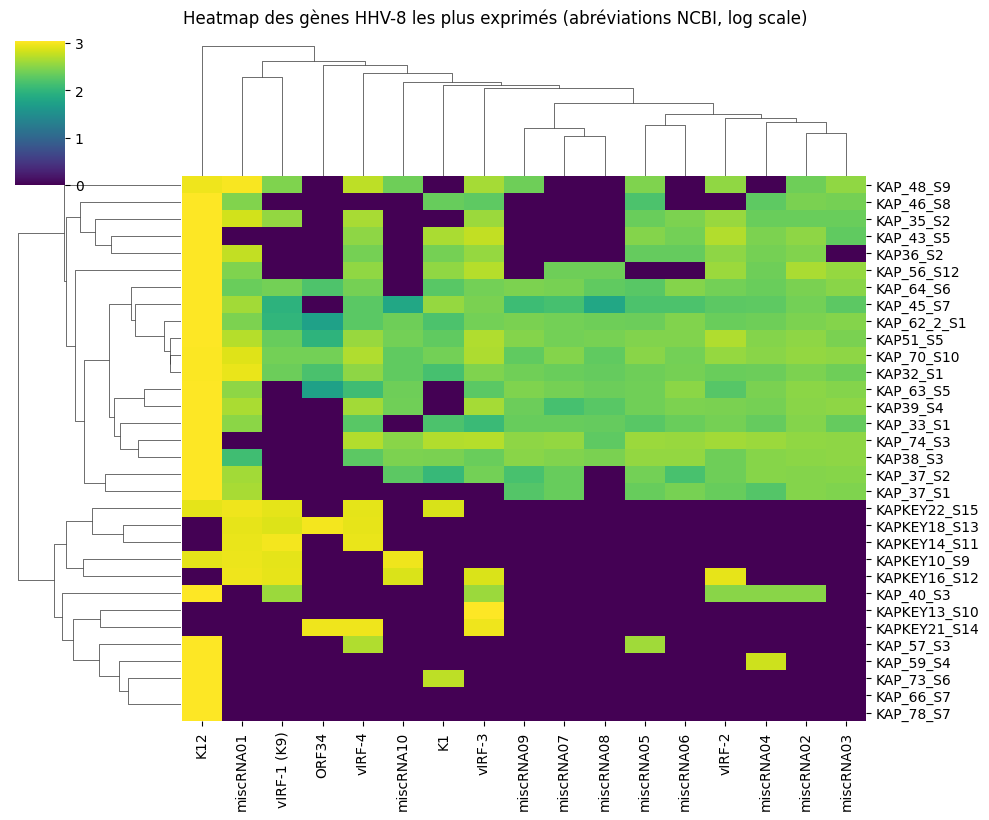


1 gènes sans expression :
['HHV8GK18_gp39']


In [18]:
# Moyenne d'expression par gène
mean_expression = df_counts.mean(axis=1).sort_values(ascending=False)
print("\nGènes les plus exprimés :")
print(mean_expression.head(10))

# plot :

df_filtered = df_counts.loc[:, df_counts.sum() > 0]  
df_gene_sorted = df_filtered.T 

top_genes = mean_expression[mean_expression > 0].head(20).index.tolist()
df_top_genes = df_gene_sorted[top_genes]

# heatmap avec abréviations NCBI sur l'axe X
df_log = df_top_genes.apply(lambda x: np.log(x + 1))
gene_labels = [gene_abbr.get(g, g) for g in top_genes]
df_log.columns = gene_labels

plt.figure(figsize=(10, 8))
sns.clustermap(df_log, cmap="viridis", yticklabels=True, xticklabels=True, annot=False, figsize=(10, 8))
print("\nHeatmap des gènes les plus exprimés (top 20):")
plt.suptitle("Heatmap des gènes HHV-8 les plus exprimés (abréviations NCBI, log scale)", y=1.02)
plt.show()

zero_genes = df_counts[df_counts.sum(axis=1) == 0].index.tolist()
print(f"\n{len(zero_genes)} gènes sans expression :")
print(zero_genes[:10])

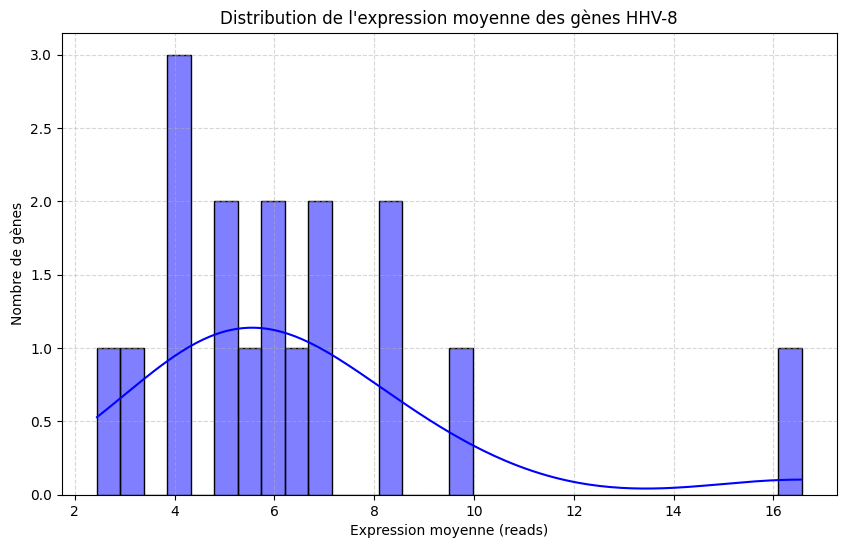

In [17]:
#Histogramme de l'expression moyenne des gènes
# Expression moyenne par gène
mean_expression = df_counts.mean(axis=1).sort_values(ascending=False)

mean_expression = mean_expression[mean_expression > 0]

# Histogramme
plt.figure(figsize=(10, 6))
sns.histplot(mean_expression, bins=30, kde=True, color='blue')
plt.xlabel("Expression moyenne (reads)")
plt.ylabel("Nombre de gènes")
plt.title("Distribution de l'expression moyenne des gènes HHV-8")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

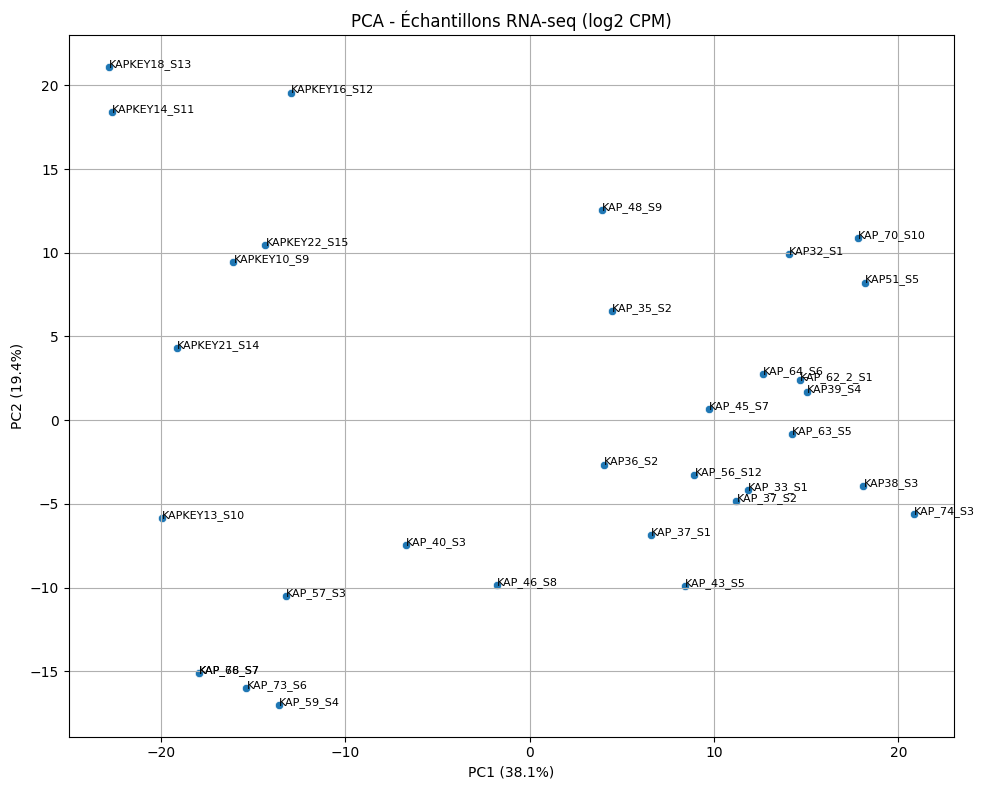

In [ ]:
from sklearn.decomposition import PCA

# Remove columns (samples) with any NaN values
df_counts_no_nan = df_counts.dropna(axis=1)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_counts_no_nan.T)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
for i, sample in enumerate(df_counts_no_nan.columns):
    plt.annotate(sample, (pca_result[i, 0], pca_result[i, 1]), fontsize=8)
plt.title("PCA - Échantillons RNA-seq (log2 CPM)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.grid(True)
plt.tight_layout()
plt.show()

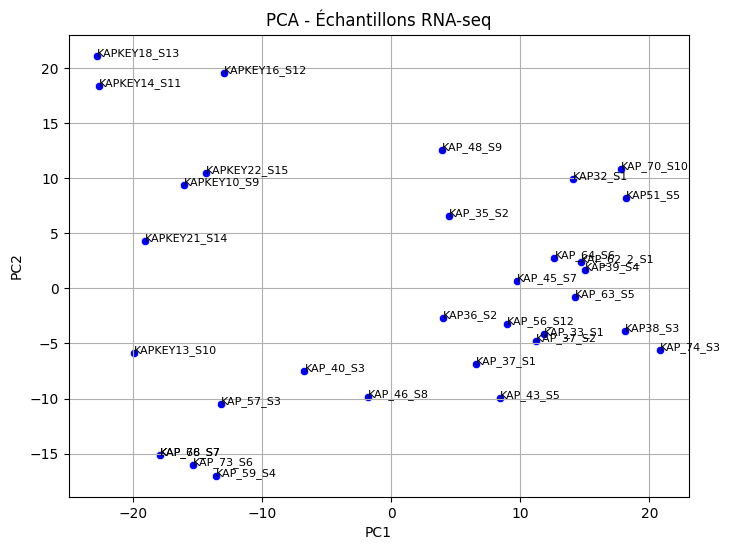

In [27]:
from sklearn.decomposition import PCA

# Remove columns (samples) with any NaN values
df_counts_no_nan = df_counts.dropna(axis=1)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_counts_no_nan.T)

# Plot 
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1],  color='blue')
for i, txt in enumerate(df_counts_no_nan.columns):
    plt.annotate(txt, (pca_result[i,0], pca_result[i,1]),  fontsize=8)
plt.title("PCA - Échantillons RNA-seq")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()